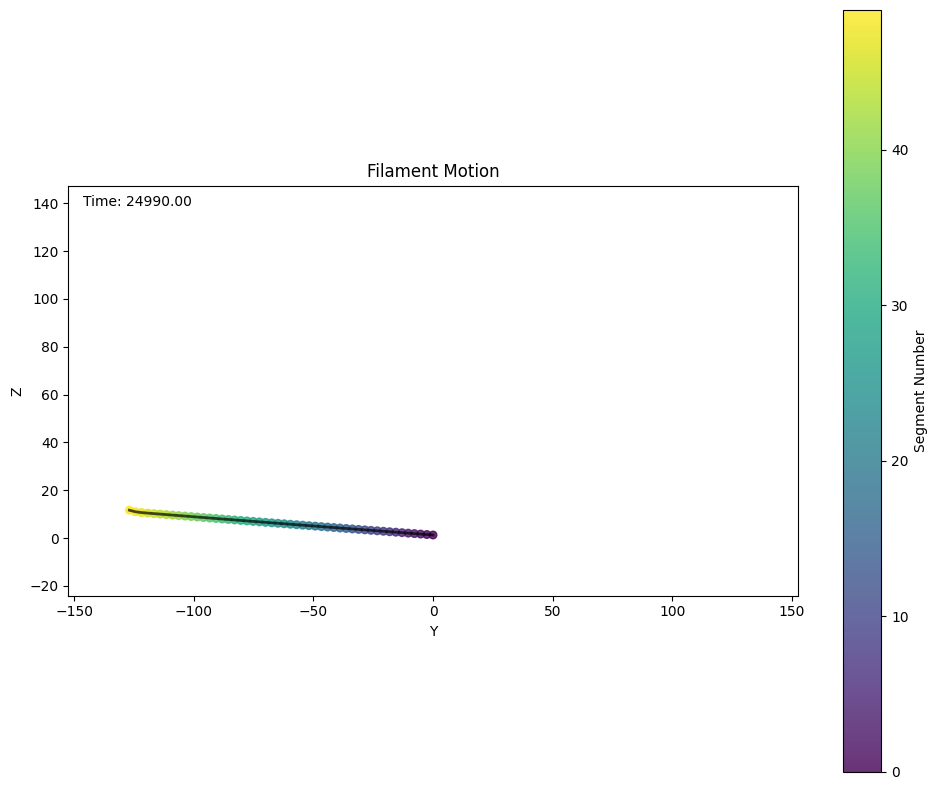

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

file_path = '../data/travelling_wave_1000steps/20250710/ciliate_1fil_9000blob_8.00R_0.0001torsion_0.0000tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_states.dat'

data = np.loadtxt(file_path)
num_steps = data.shape[0]
num_segs = (data.shape[1] - 1)/3

time = data[:,0]
seg_states = data[:,1:].reshape(num_steps, int(num_segs), 3)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# For consistent colormapping
segment_numbers = np.arange(int(num_segs))
norm = plt.Normalize(segment_numbers.min(), segment_numbers.max())

# Initialize the plot objects
line, = ax.plot([], [], 'k-', lw=2, alpha=0.7)
scatter = ax.scatter([], [], c=[], cmap='viridis', norm=norm, s=30, alpha=0.8)

# Set axis labels
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_title('Filament Motion')
ax.set_aspect('equal')

# Find data bounds for consistent axis limits
y_min, y_max = np.min(seg_states[:,:,1]), np.max(seg_states[:,:,1])
z_min, z_max = np.min(seg_states[:,:,2]), np.max(seg_states[:,:,2])
padding = 0.1 * max(y_max - y_min, z_max - z_min)
ax.set_xlim(y_min - padding, y_max + padding)
ax.set_ylim(z_min - padding, z_max + padding)

# Add time text
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
  line.set_data([], [])
  scatter.set_offsets(np.empty((0, 2)))
  scatter.set_array(np.array([]))
  time_text.set_text('')
  return line, scatter, time_text

def update(frame):
  positions = seg_states[frame]
  
  # Update line connecting segments
  line.set_data(positions[:, 1], positions[:, 2])
  
  # Update scatter points
  scatter.set_offsets(positions[:, 1:3])
  scatter.set_array(segment_numbers)
  
  # Update time display
  time_text.set_text(f'Time: {time[frame]:.2f}')
  
  return line, scatter, time_text

# Create animation (use stride to control speed)
stride = 15  # Adjust this to make animation faster/slower
frames = range(0, num_steps, stride)
ani = FuncAnimation(fig, update, frames=frames, init_func=init, 
          blit=True, interval=30, repeat=True)

# Save animation as GIF
ani.save('filament_motion.gif', writer='pillow', fps=30)

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Segment Number')

plt.tight_layout()
plt.show()
